# LLM - Detect AI Generated Text


# Identify which essay was written by a large language model

In [ ]:
#The dataset comprises about 10,000 essays,
#some written by students and some generated by a variety of large language models (LLMs). 
#The goal of this project is to determine whether or not essay was generated by an LLM.

In [ ]:
# implement a model can accurately detect whether an essay was written by a student or an LLM.

In [ ]:
#About the dataset

In [ ]:
#id - A unique identifier for each essay.
#prompt_id - Identifies the prompt the essay was written in response to.
#text - The essay text itself.
#generated - Whether the essay was written by a student (0) or generated by an LLM (1).
#This field is the target.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Import the datasets and understand the data
train_essays = pd.read_csv(r"C:\Users\FATHIMA SHEMEEMA\Desktop\New folder\train_essays.csv")
train_essays


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [3]:
# Count the number of rows and columns in the dataset
print(train_essays.shape)

(1378, 4)


In [4]:
df1=train_essays.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [5]:
#statistical description of the data
df1.describe()

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [6]:
# Check how many essays are generated 
LLM = df1['generated'] ==1
LLM

0       False
1       False
2       False
3       False
4       False
        ...  
1373    False
1374    False
1375    False
1376    False
1377    False
Name: generated, Length: 1378, dtype: bool

In [7]:
LLM.sum()

3

In [8]:
#Lets check the essays written by the LLMs¶
df1[train_essays['generated'] == True]

,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


In [9]:
not_LLM = df1['generated'] == 0
not_LLM

0       True
1       True
2       True
3       True
4       True
        ... 
1373    True
1374    True
1375    True
1376    True
1377    True
Name: generated, Length: 1378, dtype: bool

In [10]:
not_LLM.sum()

1375

In [11]:
#Lets check the essays written by the human
df1[train_essays['generated'] == False]

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


<AxesSubplot:xlabel='generated', ylabel='count'>

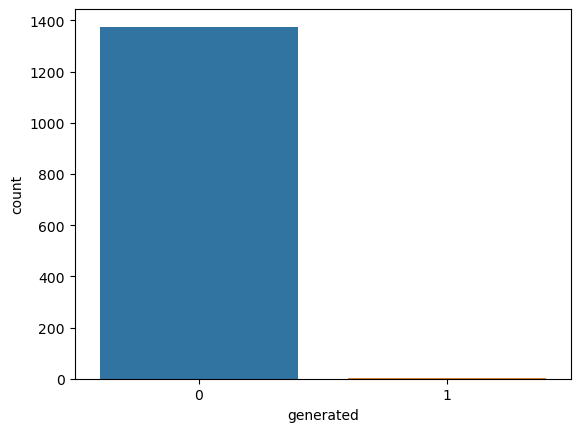

In [12]:
import seaborn as sns

sns.countplot(x="generated",data=df1)


# load test dataset

In [14]:
test=pd.read_csv(r"C:\Users\FATHIMA SHEMEEMA\Desktop\New folder\test_essays.csv")
test

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [15]:
df1.isnull().sum()

id           0
prompt_id    0
text         0
generated    0
dtype: int64

In [16]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(df1, test_size=0.1, random_state=73)

In [17]:
# Extract features from text using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1, 5),sublinear_tf=True)  # Adjust max_features as needed
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_val = tfidf_vectorizer.transform(val_data['text'])

In [18]:
# Assign labels
y_train = train_data['generated']
y_val = val_data['generated']

# Applying Machine learning model

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


In [20]:
#Logistic regression
lr_model = LogisticRegression()

In [21]:
#SGD
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, loss="modified_huber")

In [22]:
#Voting classifier
# Create the ensemble model
ensemble = VotingClassifier(estimators=[('lr', lr_model), ('xgb', sgd_model)], voting='soft')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('xgb', SGDClassifier(loss='modified_huber'))],
                 voting='soft')

# Prediction

In [23]:
preds_test = ensemble.predict_proba(X_val)[:,1]
preds_test

array([0.00082798, 0.00081084, 0.00079807, 0.00086369, 0.00079044,
       0.00081581, 0.00079839, 0.00077189, 0.00085347, 0.00079566,
       0.00090147, 0.00079069, 0.00086532, 0.00076278, 0.0008574 ,
       0.000783  , 0.00080968, 0.00076922, 0.00078542, 0.00083794,
       0.00083945, 0.0007926 , 0.000807  , 0.00087634, 0.00083156,
       0.00082606, 0.00072965, 0.00080674, 0.00077482, 0.00083001,
       0.00081507, 0.00085861, 0.0008079 , 0.00076373, 0.00090615,
       0.00082669, 0.00076312, 0.00079208, 0.00083381, 0.00080417,
       0.00084118, 0.00089296, 0.00080678, 0.00082314, 0.00079362,
       0.00088046, 0.00088324, 0.00073327, 0.00083365, 0.0007288 ,
       0.00084223, 0.00083085, 0.00090891, 0.00084998, 0.00083641,
       0.00076905, 0.00081374, 0.00079254, 0.00076461, 0.00076649,
       0.00083583, 0.00078325, 0.00090328, 0.00081632, 0.00085721,
       0.0007353 , 0.00083631, 0.00078494, 0.00077476, 0.00082942,
       0.00076603, 0.00086849, 0.00075245, 0.00083598, 0.00081

In [27]:
pred=preds_test
pred

array([0.00082798, 0.00081084, 0.00079807, 0.00086369, 0.00079044,
       0.00081581, 0.00079839, 0.00077189, 0.00085347, 0.00079566,
       0.00090147, 0.00079069, 0.00086532, 0.00076278, 0.0008574 ,
       0.000783  , 0.00080968, 0.00076922, 0.00078542, 0.00083794,
       0.00083945, 0.0007926 , 0.000807  , 0.00087634, 0.00083156,
       0.00082606, 0.00072965, 0.00080674, 0.00077482, 0.00083001,
       0.00081507, 0.00085861, 0.0008079 , 0.00076373, 0.00090615,
       0.00082669, 0.00076312, 0.00079208, 0.00083381, 0.00080417,
       0.00084118, 0.00089296, 0.00080678, 0.00082314, 0.00079362,
       0.00088046, 0.00088324, 0.00073327, 0.00083365, 0.0007288 ,
       0.00084223, 0.00083085, 0.00090891, 0.00084998, 0.00083641,
       0.00076905, 0.00081374, 0.00079254, 0.00076461, 0.00076649,
       0.00083583, 0.00078325, 0.00090328, 0.00081632, 0.00085721,
       0.0007353 , 0.00083631, 0.00078494, 0.00077476, 0.00082942,
       0.00076603, 0.00086849, 0.00075245, 0.00083598, 0.00081

In [28]:
predicted=pred[0:3]

In [ ]:
# # Evaluate the model's performance (e.g., accuracy, precision, recall, etc.)
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# accuracy = accuracy_score(y_val, pred)
# precision = precision_score(y_val, pred)
# recall = recall_score(y_val, pred)

# print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

In [29]:
subb=pd.DataFrame({'id':test["id"],'generated':predicted})
subb

,id,generated
0,0000aaaa,0.000828
1,1111bbbb,0.000811
2,2222cccc,0.000798


<AxesSubplot:xlabel='generated', ylabel='count'>

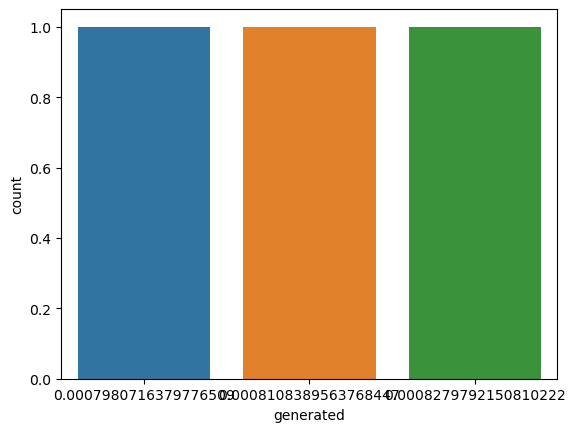

In [32]:
sns.countplot(x='generated', data=subb)

In [34]:
subb.to_csv(r'C:\Users\FATHIMA SHEMEEMA\Desktop\New folder\submissionn.csv', index=False)